In [95]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")


In [96]:
df=pd.read_csv("/Users/aishwaryarawat/Downloads/retail_price.csv")
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [97]:
df.shape

(676, 30)

In [98]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [99]:

df.drop("product_id",axis=1,inplace=True)


In [100]:
df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
qty,676.0,14.495562,15.443421,1.000000,1.000000,2.000000,4.000000,6.000000,10.000000,14.000000,18.000000,31.500000,44.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
unit_price,676.0,106.496800,76.182972,19.900000,29.900000,36.527143,53.900000,59.900000,89.900000,105.000000,129.990000,186.907143,325.000000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,178.000000,236.000000,339.000000,363.000000,501.000000,735.000000,903.000000,1893.000000,2188.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00


In [101]:
df.sort_values("total_price",ascending=False).head(10) #total price highest

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,584,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,533,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,400,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,400,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,584,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,2600,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,533,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,363,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


## Data Preprocessing

In [102]:
df.isna().sum()

product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

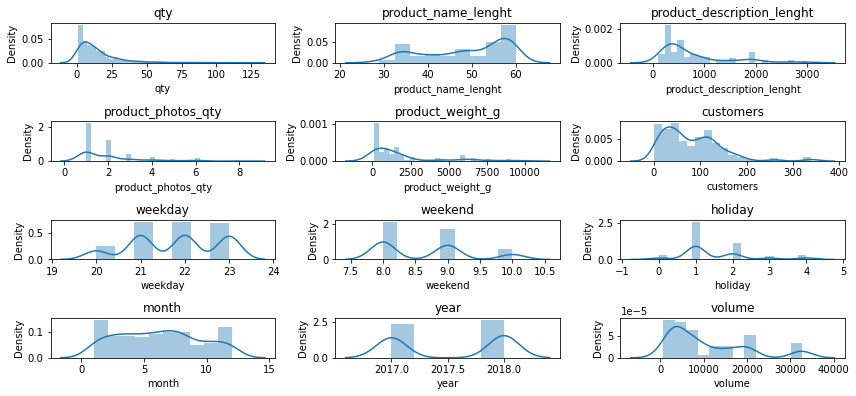

In [103]:
## let's look at the distribution states of numeric variables;
k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes("int"):
    plt.subplot(9,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [104]:
#Let's try 2 different approaches, 1st let's not touch the outliers, 
#2nd remove the outliers and make a copy, then compare

In [105]:
df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
qty,676.0,14.495562,15.443421,1.000000,1.000000,2.000000,4.000000,6.000000,10.000000,14.000000,18.000000,31.500000,44.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
unit_price,676.0,106.496800,76.182972,19.900000,29.900000,36.527143,53.900000,59.900000,89.900000,105.000000,129.990000,186.907143,325.000000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,178.000000,236.000000,339.000000,363.000000,501.000000,735.000000,903.000000,1893.000000,2188.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00


In [106]:
df_outlier_remove=df.copy()

In [107]:
outlier_list=["qty","customers","comp_1","comp_3"]


for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

qty yes
customers no
comp_1 yes
comp_3 no


In [108]:
# We detected outliers in columns gty and comp_1
#reach outliers
def outliers_train(df_outlier_remove):
    q1,q3=np.percentile(df_outlier_remove,[10,90])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_train=[i for i in df_outlier_remove if i<low or i>high]
    return outliers_train

In [109]:
outliers_train(df.qty)
# There are 9 outliers (for qty)

[87, 91, 82, 85, 114, 76, 122, 83, 92]

In [110]:
outliers_train(df.comp_1)
# We have 3 outliers (comp_1)

[349.9, 349.9, 339.9]

In [111]:
# let's eliminate outliers
for i in df_outlier_remove.loc[:,outlier_list]:
    
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    df_outlier_remove.loc[df_outlier_remove[i]>up_lim,i]=up_lim
    df_outlier_remove.loc[df_outlier_remove[i]<low_lim,i]=low_lim

In [112]:
for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

qty no
customers no
comp_1 no
comp_3 no


## Time Series Analysis

In [113]:
from datetime import datetime
df["month_year"] = pd.to_datetime(df.month_year)
df["day"]=df["month_year"].dt.day
df.head()

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,6
2,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,7
3,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,8
4,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,9


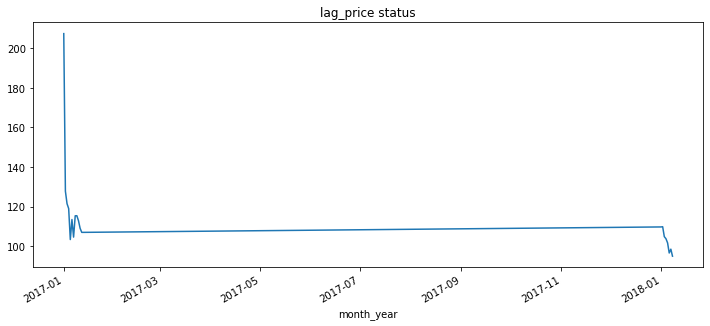

In [114]:
custgroup=df.groupby('month_year').mean()
plt.figure(figsize=(12,5))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status")
plt.show()

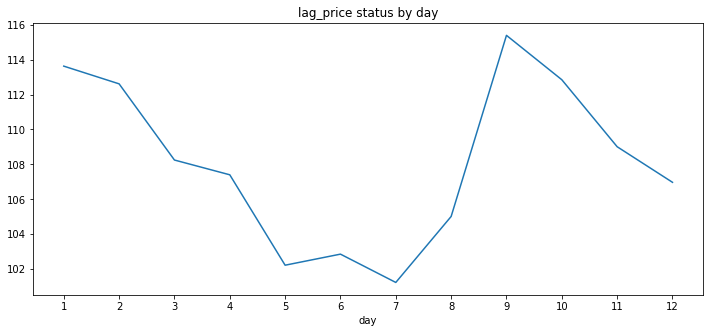

In [115]:
custgroup=df.groupby('day').mean()
fig,ax=plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status by day")
plt.show()

In [116]:
# let's do the same updates in df_remove_outlier
df_outlier_remove["month_year"] = pd.to_datetime(df_outlier_remove.month_year)
df_outlier_remove["day"]=df_outlier_remove["month_year"].dt.day
df_outlier_remove.drop("month_year",axis=1,inplace=True)
df_outlier_remove.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


In [117]:

df.drop("month_year",axis=1,inplace=True)
df.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


## Data visualisation

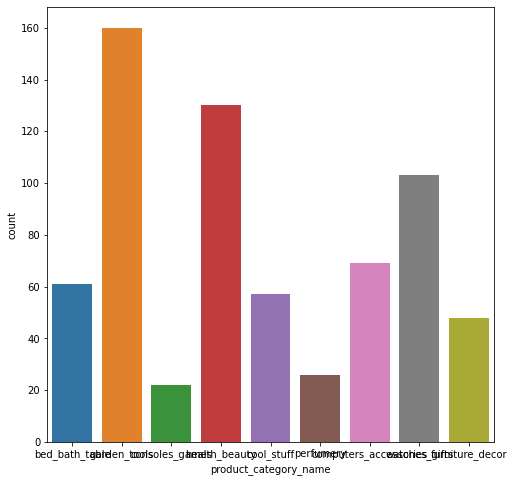

In [118]:
plt.figure(figsize=(8,8))
sns.countplot(df.product_category_name);

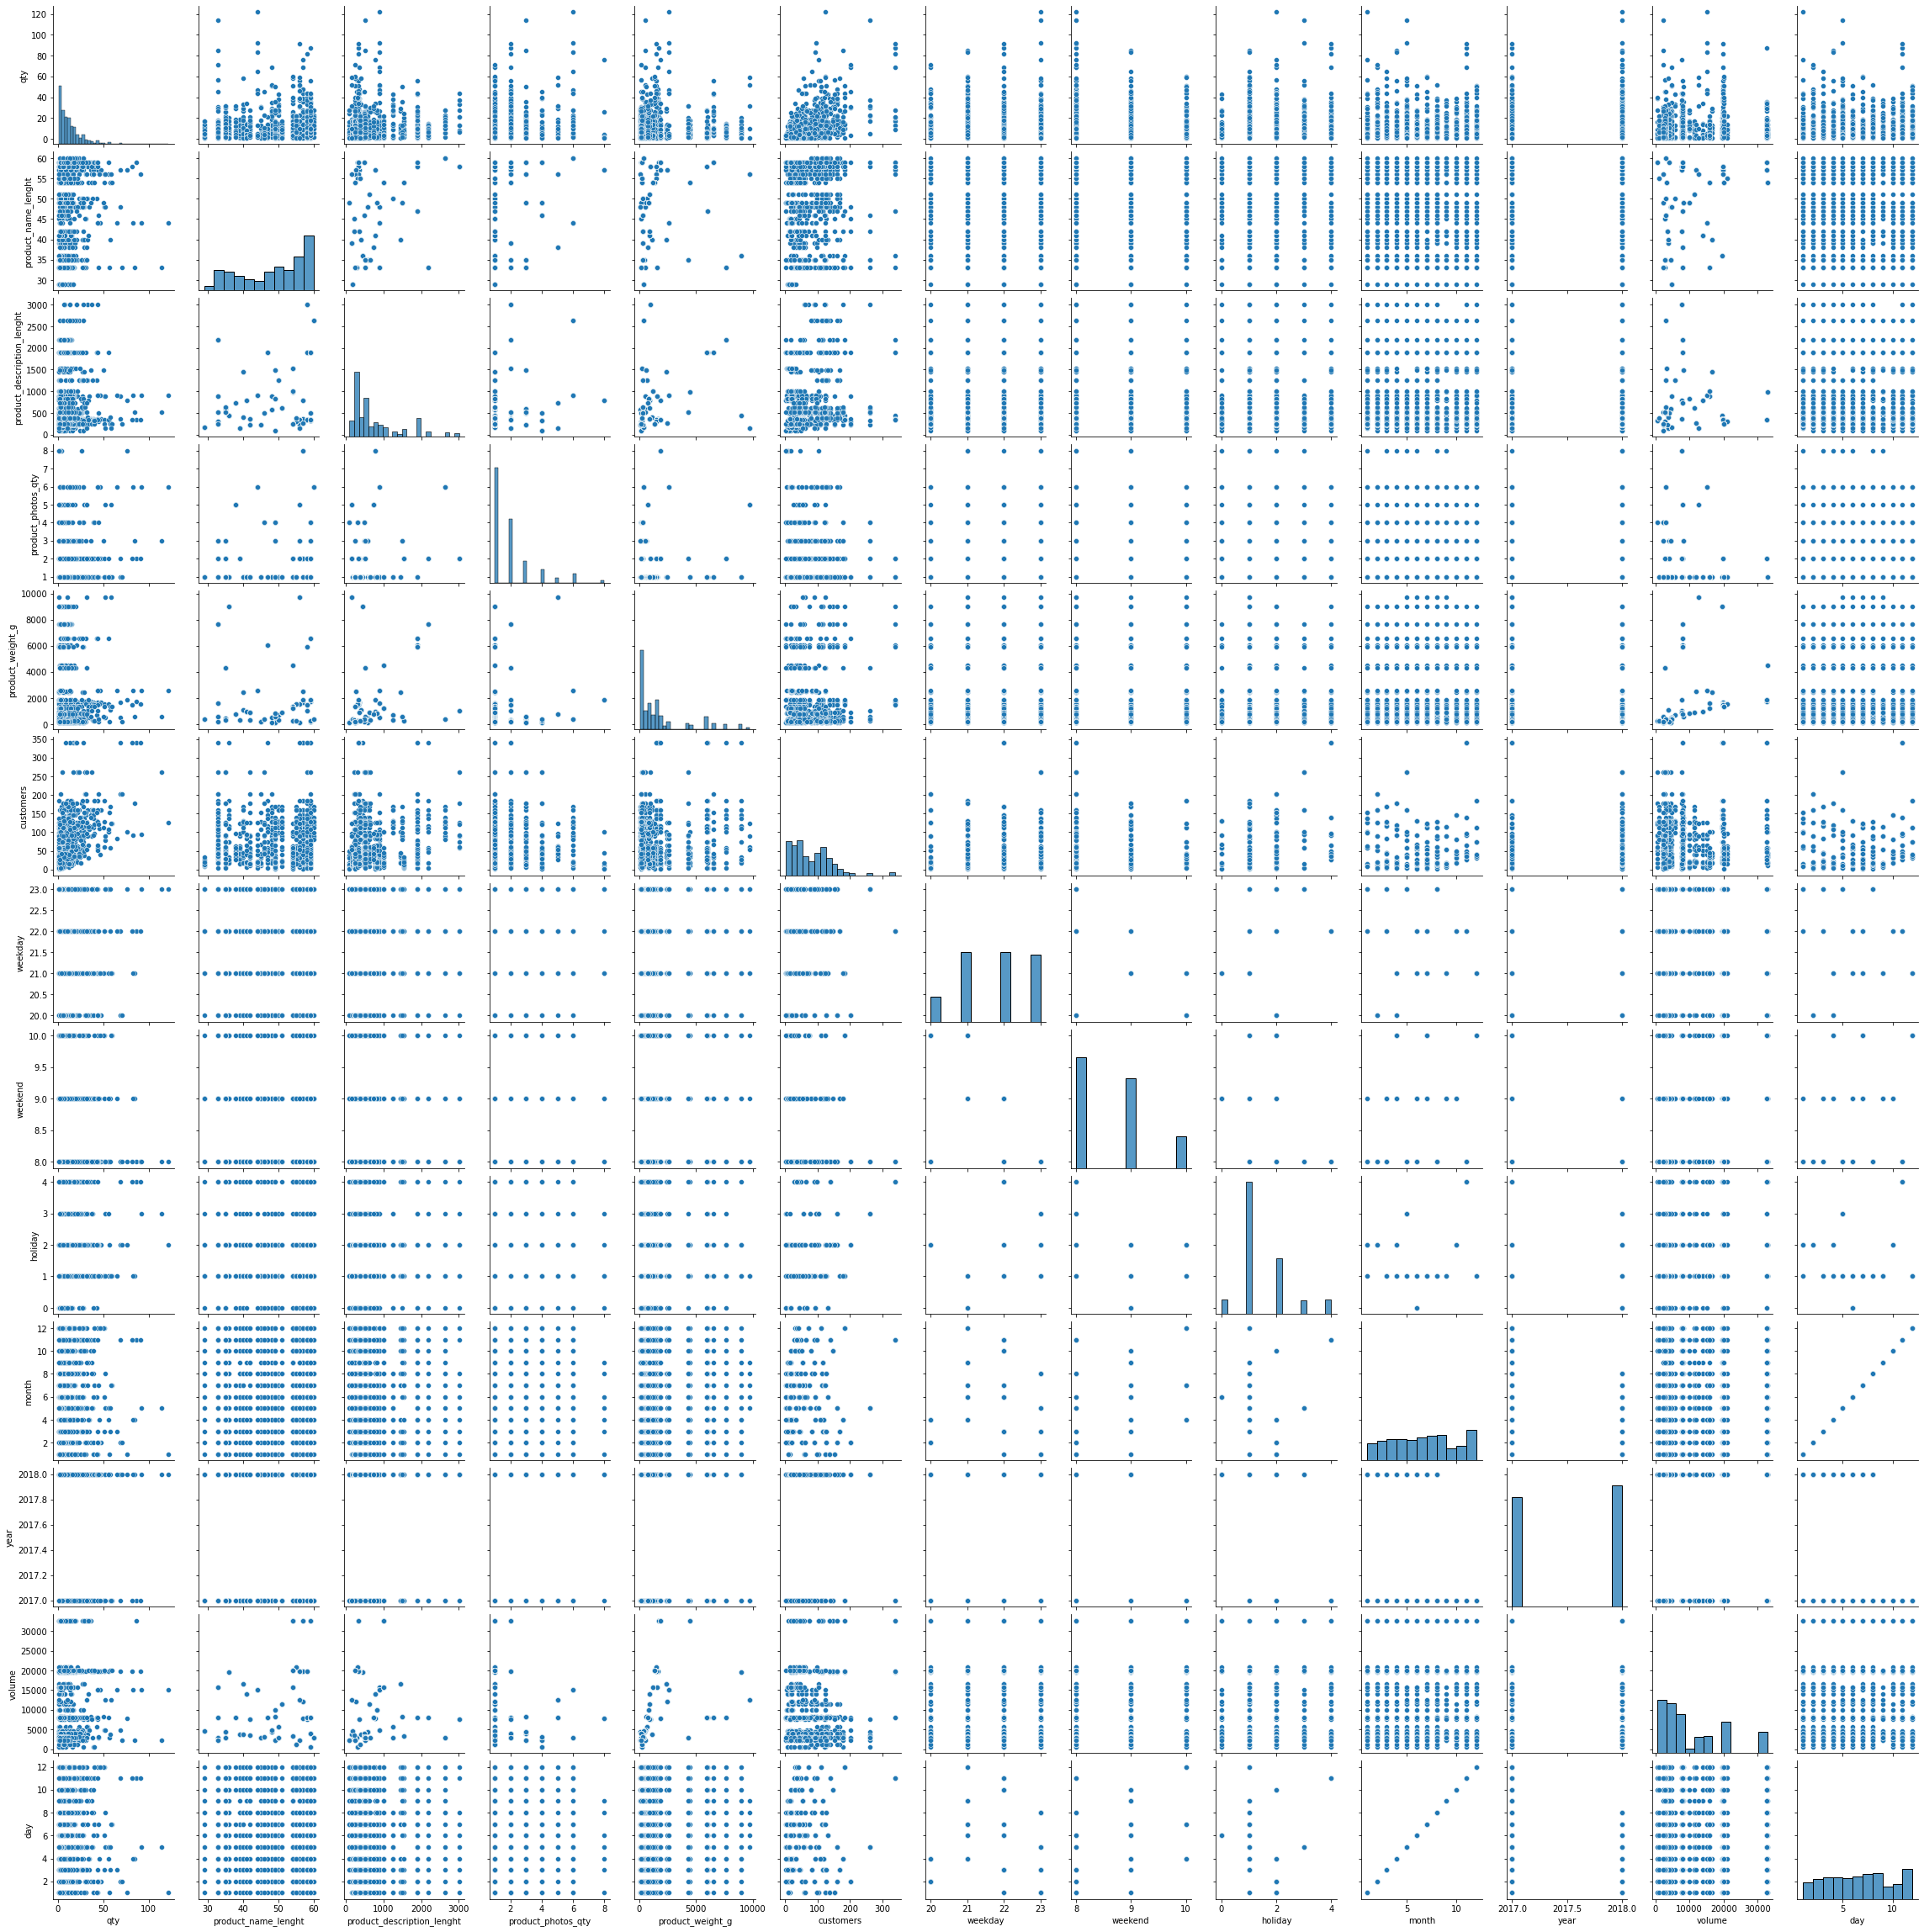

In [119]:
 sns.pairplot(df.select_dtypes("int"));

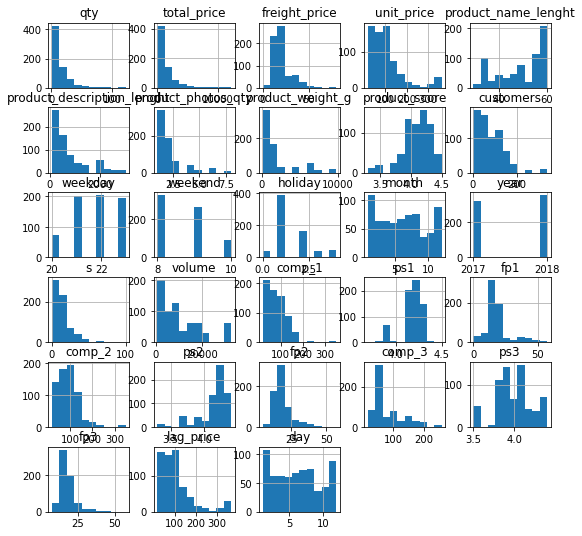

In [120]:
df.hist(figsize=(9,9));

## one hot encoding 

In [121]:
dms=pd.get_dummies(df["product_category_name"])


In [122]:
df.drop("product_category_name",axis=1,inplace=True)
df=pd.concat([df,dms],axis=1)
df.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,day,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,5,1,0,0,0,0,0,0,0,0
1,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,6,1,0,0,0,0,0,0,0,0
2,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,7,1,0,0,0,0,0,0,0,0
3,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,8,1,0,0,0,0,0,0,0,0
4,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,9,1,0,0,0,0,0,0,0,0


In [123]:
# remove outlier for;

dms2=pd.get_dummies(df_outlier_remove["product_category_name"])
df_outlier_remove.drop("product_category_name",axis=1,inplace=True)
df_outlier_remove=pd.concat([df_outlier_remove,dms2],axis=1)

## corelation analysis

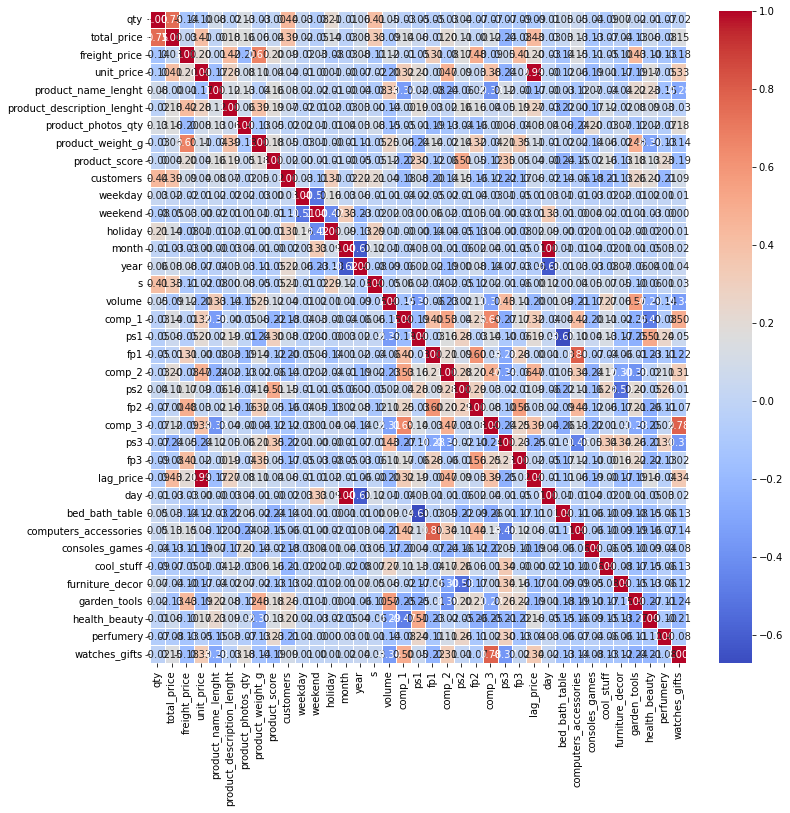

In [124]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [125]:

cor=df.corr()["lag_price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with lag_price":cor.values})

,column,Correlation with lag_price
0,lag_price,1.000000
1,unit_price,0.994453
2,comp_2,0.465271
3,total_price,0.426256
4,comp_3,0.385621
5,watches_gifts,0.335569
6,comp_1,0.322348
7,product_description_lenght,0.273883
8,freight_price,0.201143
9,ps1,0.194805


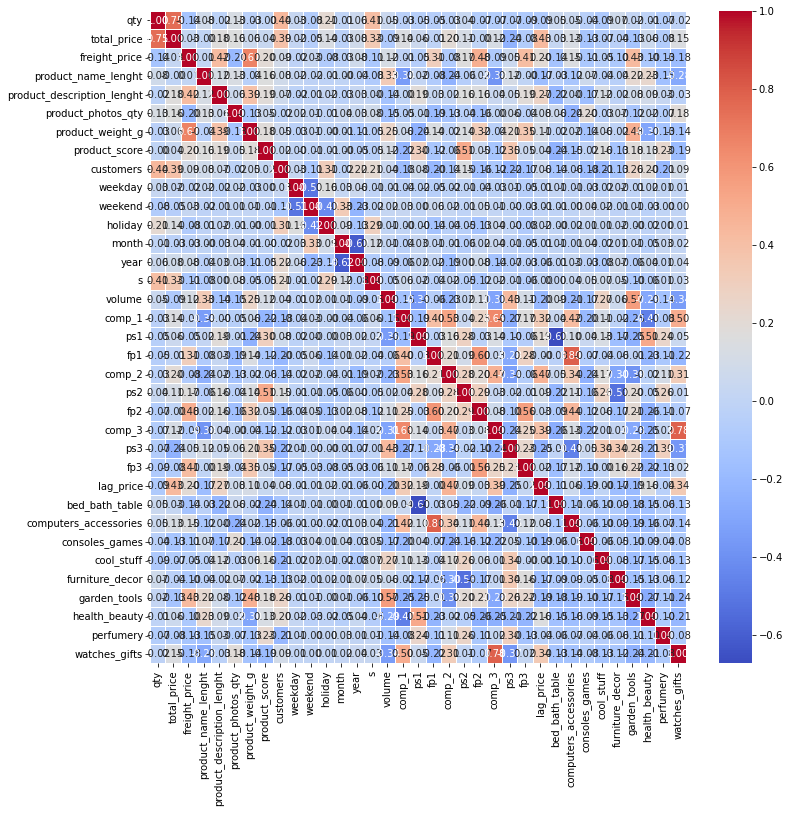

In [126]:
df.drop(["unit_price","day"],axis=1,inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [127]:
# df_remove outlier;

df_outlier_remove.drop(["unit_price","day"],axis=1,inplace=True)

## Modeling 

In [128]:
X=df.drop("lag_price",axis=1)
y=df["lag_price"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [129]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [130]:
!pip install catboost
!pip install lightgbm


In [131]:
!pip install xgboost

In [132]:
from xgboost import XGBRegressor


In [133]:
from catboost import CatBoostRegressor


In [134]:
conda install lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [135]:
from lightgbm import LGBMRegressor

In [138]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)


Learning rate set to 0.036375
0:	learn: 75.3490571	total: 3.79ms	remaining: 3.78s
1:	learn: 73.7083830	total: 4.83ms	remaining: 2.41s
2:	learn: 72.4964201	total: 5.79ms	remaining: 1.93s
3:	learn: 71.0686127	total: 6.77ms	remaining: 1.69s
4:	learn: 69.3441221	total: 8.1ms	remaining: 1.61s
5:	learn: 67.5371692	total: 9.31ms	remaining: 1.54s
6:	learn: 66.1683342	total: 10.4ms	remaining: 1.48s
7:	learn: 64.9909821	total: 11.4ms	remaining: 1.42s
8:	learn: 63.8675751	total: 12.4ms	remaining: 1.37s
9:	learn: 62.5807821	total: 13.5ms	remaining: 1.34s
10:	learn: 61.6445434	total: 14.7ms	remaining: 1.32s
11:	learn: 60.9088998	total: 16.2ms	remaining: 1.33s
12:	learn: 60.0072173	total: 17.3ms	remaining: 1.31s
13:	learn: 58.9198442	total: 18.3ms	remaining: 1.29s
14:	learn: 57.9591879	total: 19.4ms	remaining: 1.27s
15:	learn: 57.0666462	total: 20.4ms	remaining: 1.25s
16:	learn: 56.0377488	total: 21.5ms	remaining: 1.24s
17:	learn: 55.1801640	total: 22.6ms	remaining: 1.24s
18:	learn: 54.0731050	total

In [139]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [140]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

Ridge() Algorithm succed rate : 0.6987588727620234
Lasso() Algorithm succed rate : 0.6815198367914457
ElasticNet() Algorithm succed rate : 0.6597231666932599
KNeighborsRegressor() Algorithm succed rate : 0.8677431752985709
AdaBoostRegressor() Algorithm succed rate : 0.9123927061083326
SVR() Algorithm succed rate : 0.025724718616277675
MLPRegressor() Algorithm succed rate : 0.49825706955615057
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.9893282306983802
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
        